# Step 2: Download Top 100 Hot Latin Songs List from 2018 on Billboard.com

In [1]:
import pandas as pd
import numpy as np
import requests
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from bs4 import BeautifulSoup
import sys
import re
import string
from datetime import datetime
from wordcloud import WordCloud
from collections import Counter
from os import path
from PIL import Image

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def collect_songs_from_billboard(start_year,end_year):
    years = np.arange(start_year, end_year + 1).astype(int)
    dataset = pd.DataFrame()
    url_list = []
    all_years = pd.DataFrame()
    for i in range (0, len(years)):
        url_list.append("https://www.billboard.com/charts/year-end/" + str(years[i]) + "/hot-latin-songs")      
    for i in range(0, len(url_list)):
            sys.stdout.write("\r" + "Collecting Songs from " +str(years[i]) + " via https://www.billboard.com")
            sys.stdout.flush()
            url = "https://www.billboard.com/charts/year-end/" + str(years[i]) + "/hot-latin-songs"
            page = requests.get(url)
            soup = BeautifulSoup(page.content, "html.parser")
            all_ranks = soup.find_all("div", class_="ye-chart-item__rank")
            all_titles = soup.find_all('div', class_="ye-chart-item__title")
            all_artists = soup.find_all("div", class_="ye-chart-item__artist")
            for j in range (0, len(all_ranks)):
                row = {
                    "Rank": all_ranks[j].get_text(strip=True),
                    "Song Title": all_titles[j].get_text(strip=True),
                    "Artist": all_artists[j].get_text(strip=True),
                    "Year": years[i]
                }
                dataset = dataset.append(row, ignore_index=True)
    dataset['Year'] = dataset['Year'].astype(int)
    return dataset

In [4]:
all_songs = collect_songs_from_billboard(2018, 2018)

In [5]:
display(all_songs.head(5))
display(all_songs.tail(5))
display(all_songs.shape)

,Artist,Rank,Song Title,Year
0,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,1,Despacito,2018
1,J Balvin & Willy William Featuring Beyonce,2,Mi Gente,2018
2,Daddy Yankee,3,Dura,2018
3,Nicky Jam x J Balvin,4,X,2018
4,"Casper Magico, Nio Garcia, Darell, Nicky Jam, ...",5,Te Bote,2018


,Artist,Rank,Song Title,Year
95,Banda La Misma Tierra,96,Si No Estas Tu,2018
96,Silvestre Dangond & Natti Natasha,97,Justicia,2018
97,Raymix,98,Donde Estaras,2018
98,Lenin Ramirez Featuring T3r Elemento,99,Rolling One,2018
99,T3r Elemento,100,Rafa Caro,2018


(100, 4)

In [6]:
pd.DataFrame(all_songs).to_excel('Latin_Songs_2018.xlsx', header=True, index=True)

Resources/Citation for Code:
- https://github.com/sharpie-007/dataAndMusic/blob/master/49%20Years%20of%20Music%20-%20Collection%20and%20Analysis.ipynb

# Step 3: Plot Data on Song List for Influencial Artists 

### Top Artists on #1 Hit List

In [7]:
import pandas as pd
df = pd.read_excel('Latin_Songs_2018.xlsx',sheet_name='Sheet1')
df.head(10)

,Artist,Rank,Song Title,Year
0,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,1,Despacito,2018
1,J Balvin & Willy William Featuring Beyonce,2,Mi Gente,2018
2,Daddy Yankee,3,Dura,2018
3,Nicky Jam x J Balvin,4,X,2018
4,"Casper Magico, Nio Garcia, Darell, Nicky Jam, ...",5,Te Bote,2018
5,Ozuna & Romeo Santos,6,El Farsante,2018
6,Luis Fonsi & Demi Lovato,7,Echame La Culpa,2018
7,Ozuna x Cardi B,8,La Modelo,2018
8,Becky G + Natti Natasha,9,Sin Pijama,2018
9,Reik Featuring Ozuna & Wisin,10,Me Niego,2018


In [8]:
df['Artist'].value_counts(normalize=True) *100

Bad Bunny                                                               3.0
Calibre 50                                                              3.0
Banda Sinaloense MS de Sergio Lizarraga                                 3.0
Maluma                                                                  3.0
Ozuna                                                                   3.0
T3r Elemento                                                            2.0
Wisin Featuring Ozuna                                                   2.0
La Arrolladora Banda el Limon de Rene Camacho                           2.0
Christian Nodal                                                         2.0
Raymix                                                                  2.0
El de La Guitarra                                                       2.0
Wolfine                                                                 1.0
Romeo Santos Featuring Ozuna                                            1.0
Abraham Mate

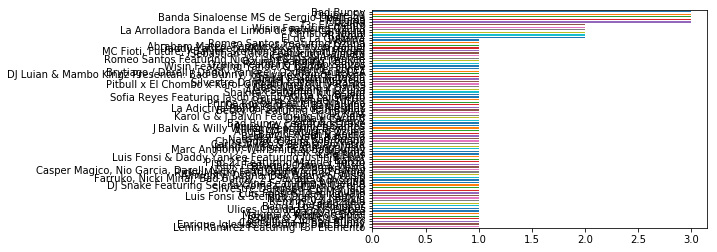

In [9]:
artist = df['Artist'].value_counts(normalize=True) *100
artist.plot.barh().invert_yaxis()

In [10]:
top5_solo = df[(df['Artist'] == 'Bad Bunny') | (df['Artist'] == 'Calibre 50') | 
                (df['Artist'] == 'Maluma') | (df['Artist'] == 'Ozuna') | 
                (df['Artist'] == 'Banda Sinaloense MS de Sergio Lizarraga') ]
print(top5_solo['Artist'].value_counts())

Bad Bunny                                  3
Banda Sinaloense MS de Sergio Lizarraga    3
Maluma                                     3
Ozuna                                      3
Calibre 50                                 3
Name: Artist, dtype: int64


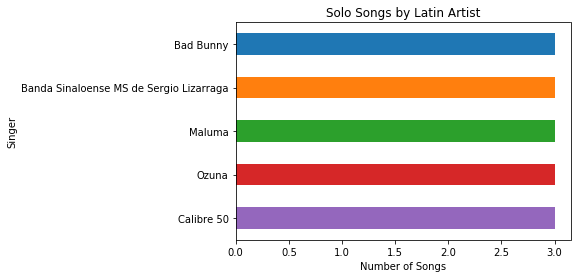

In [11]:
#matplotlib
Top5Solo = top5_solo['Artist'].value_counts()
plt.title('Solo Songs by Latin Artist')
plt.xlabel('Number of Songs')
plt.ylabel('Singer') 
Top5Solo.plot.barh().invert_yaxis()

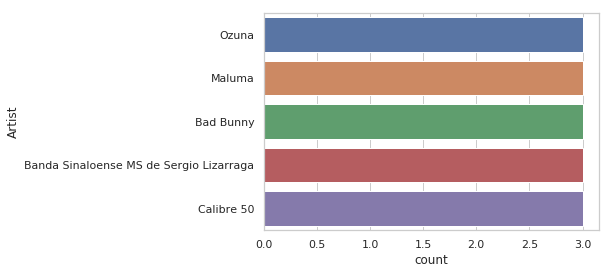

In [13]:
#seaborn
import seaborn as sns
sns.set(style="whitegrid")
p = sns.countplot(data=top5_solo, y = "Artist")

In [24]:
Bad_Bunny = df[df['Artist'].str.contains("Bad Bunny")]
Bad_Bunny['Art_Code'] = 'Bad Bunny'
Bad_Bunny

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Artist,Rank,Song Title,Year,Art_Code
4,"Casper Magico, Nio Garcia, Darell, Nicky Jam, ...",5,Te Bote,2018,Bad Bunny
15,Becky G Featuring Bad Bunny,16,Mayores,2018,Bad Bunny
17,Bad Bunny Featuring Drake,18,MIA,2018,Bad Bunny
18,"DJ Luian & Mambo Kingz Presentan: Bad Bunny, J...",19,Sensualidad,2018,Bad Bunny
21,Enrique Iglesias Featuring Bad Bunny,22,El Bano,2018,Bad Bunny
24,"Farruko, Nicki Minaj, Bad Bunny, 21 Savage & R...",25,Krippy Kush,2018,Bad Bunny
30,Bad Bunny,31,Amorfoda,2018,Bad Bunny
31,Bad Bunny,32,Estamos Bien,2018,Bad Bunny
36,Cosculluela + Bad Bunny,37,Madura,2018,Bad Bunny
44,"Almighty, Ozuna, Bad Bunny & Wisin",45,Solita,2018,Bad Bunny


In [25]:
Calibre_50 = df[df['Artist'].str.contains("Calibre 50")]
Calibre_50['Art_Code'] = 'Calibre 50'
Calibre_50

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Artist,Rank,Song Title,Year,Art_Code
60,Calibre 50,61,Mi Sorpresa Fuiste Tu,2018,Calibre 50
63,Calibre 50,64,Corrido de Juanito,2018,Calibre 50
82,Calibre 50,83,Mitad y Mitad,2018,Calibre 50


In [26]:
Maluma = df[df['Artist'].str.contains("Maluma")]
Maluma['Art_Code'] = 'Maluma'
Maluma

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Artist,Rank,Song Title,Year,Art_Code
11,Maluma X Nego do Borel,12,Corazon,2018,Maluma
20,Maluma,21,El Prestamo,2018,Maluma
23,Shakira & Maluma,24,Clandestino,2018,Maluma
32,Prince Royce Featuring Maluma,33,El Clavo,2018,Maluma
49,Maluma,50,Felices Los 4,2018,Maluma
51,Maluma,52,Mala Mia,2018,Maluma
80,Reik & Maluma,81,Amigos Con Derechos,2018,Maluma


In [27]:
Ozuna = df[df['Artist'].str.contains("Ozuna")]
Ozuna['Art_Code'] = 'Ozuna'
Ozuna

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Artist,Rank,Song Title,Year,Art_Code
4,"Casper Magico, Nio Garcia, Darell, Nicky Jam, ...",5,Te Bote,2018,Ozuna
5,Ozuna & Romeo Santos,6,El Farsante,2018,Ozuna
7,Ozuna x Cardi B,8,La Modelo,2018,Ozuna
9,Reik Featuring Ozuna & Wisin,10,Me Niego,2018,Ozuna
13,Ozuna,14,Unica,2018,Ozuna
14,"DJ Snake Featuring Selena Gomez, Ozuna & Cardi B",15,Taki Taki,2018,Ozuna
19,Natti Natasha x Ozuna,20,Criminal,2018,Ozuna
22,Ozuna x Manuel Turizo,23,Vaina Loca,2018,Ozuna
27,Ozuna,28,Siguelo Bailando,2018,Ozuna
37,Brytiago / Darell / Daddy Yankee / Ozuna / Anu...,38,Asesina,2018,Ozuna


In [28]:
Lizarraga = df[df['Artist'].str.contains("Banda Sinaloense MS de Sergio Lizarraga")]
Lizarraga['Art_Code'] = 'Banda Sinaloense MS de Sergio Lizarraga'
Lizarraga

/home/ariggs/myENV/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Artist,Rank,Song Title,Year,Art_Code
34,Banda Sinaloense MS de Sergio Lizarraga,35,Tu Postura,2018,Banda Sinaloense MS de Sergio Lizarraga
48,Banda Sinaloense MS de Sergio Lizarraga,49,El Color de Tus Ojos,2018,Banda Sinaloense MS de Sergio Lizarraga
53,Banda Sinaloense MS de Sergio Lizarraga,54,Mejor Me Alejo,2018,Banda Sinaloense MS de Sergio Lizarraga


In [31]:
top_5 = pd.concat([Bad_Bunny, Calibre_50, Maluma,Ozuna,Lizarraga])
top_5.head(10)

,Artist,Rank,Song Title,Year,Art_Code
4,"Casper Magico, Nio Garcia, Darell, Nicky Jam, ...",5,Te Bote,2018,Bad Bunny
15,Becky G Featuring Bad Bunny,16,Mayores,2018,Bad Bunny
17,Bad Bunny Featuring Drake,18,MIA,2018,Bad Bunny
18,"DJ Luian & Mambo Kingz Presentan: Bad Bunny, J...",19,Sensualidad,2018,Bad Bunny
21,Enrique Iglesias Featuring Bad Bunny,22,El Bano,2018,Bad Bunny
24,"Farruko, Nicki Minaj, Bad Bunny, 21 Savage & R...",25,Krippy Kush,2018,Bad Bunny
30,Bad Bunny,31,Amorfoda,2018,Bad Bunny
31,Bad Bunny,32,Estamos Bien,2018,Bad Bunny
36,Cosculluela + Bad Bunny,37,Madura,2018,Bad Bunny
44,"Almighty, Ozuna, Bad Bunny & Wisin",45,Solita,2018,Bad Bunny


In [32]:
top_5.tail(10)

,Artist,Rank,Song Title,Year,Art_Code
67,"Chris Jeday, Ozuna & Brytiago",68,Bipolar,2018,Ozuna
71,Anuel AA Featuring Ozuna,72,Brindemos,2018,Ozuna
72,Wisin Featuring Ozuna,73,Quisiera Alejarme,2018,Ozuna
75,Ozuna Featuring J Balvin,76,Quiero Repetir,2018,Ozuna
79,Romeo Santos Featuring Ozuna,80,Sobredosis,2018,Ozuna
85,Alex Sensation + Ozuna,86,Que Va,2018,Ozuna
91,Ozuna Featuring Romeo Santos,92,Ibiza,2018,Ozuna
34,Banda Sinaloense MS de Sergio Lizarraga,35,Tu Postura,2018,Banda Sinaloense MS de Sergio Lizarraga
48,Banda Sinaloense MS de Sergio Lizarraga,49,El Color de Tus Ojos,2018,Banda Sinaloense MS de Sergio Lizarraga
53,Banda Sinaloense MS de Sergio Lizarraga,54,Mejor Me Alejo,2018,Banda Sinaloense MS de Sergio Lizarraga


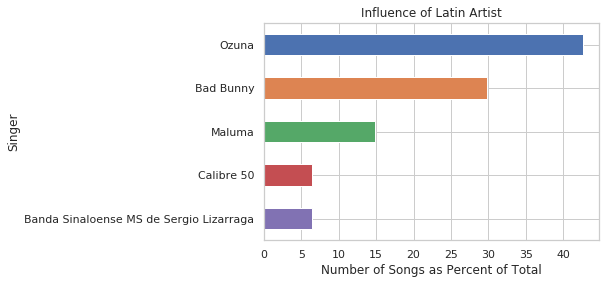

In [36]:
top_artist = top_5['Art_Code'].value_counts(normalize=True) *100
plt.title('Influence of Latin Artist')
plt.xlabel('Number of Songs as Percent of Total')
plt.ylabel('Singer') 
top_artist.plot.barh().invert_yaxis() 

In [34]:
top_artist

Ozuna                                      42.553191
Bad Bunny                                  29.787234
Maluma                                     14.893617
Calibre 50                                  6.382979
Banda Sinaloense MS de Sergio Lizarraga     6.382979
Name: Art_Code, dtype: float64